In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/bank-additional-full.csv"
data = pd.read_csv(file_path, sep=';')

In [ ]:
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [ ]:
X = data.drop(columns=['y'])
y = data['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier = DecisionTreeClassifier(random_state=42)

In [ ]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 88.94%
Confusion Matrix:
[[6846  457]
 [ 454  481]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



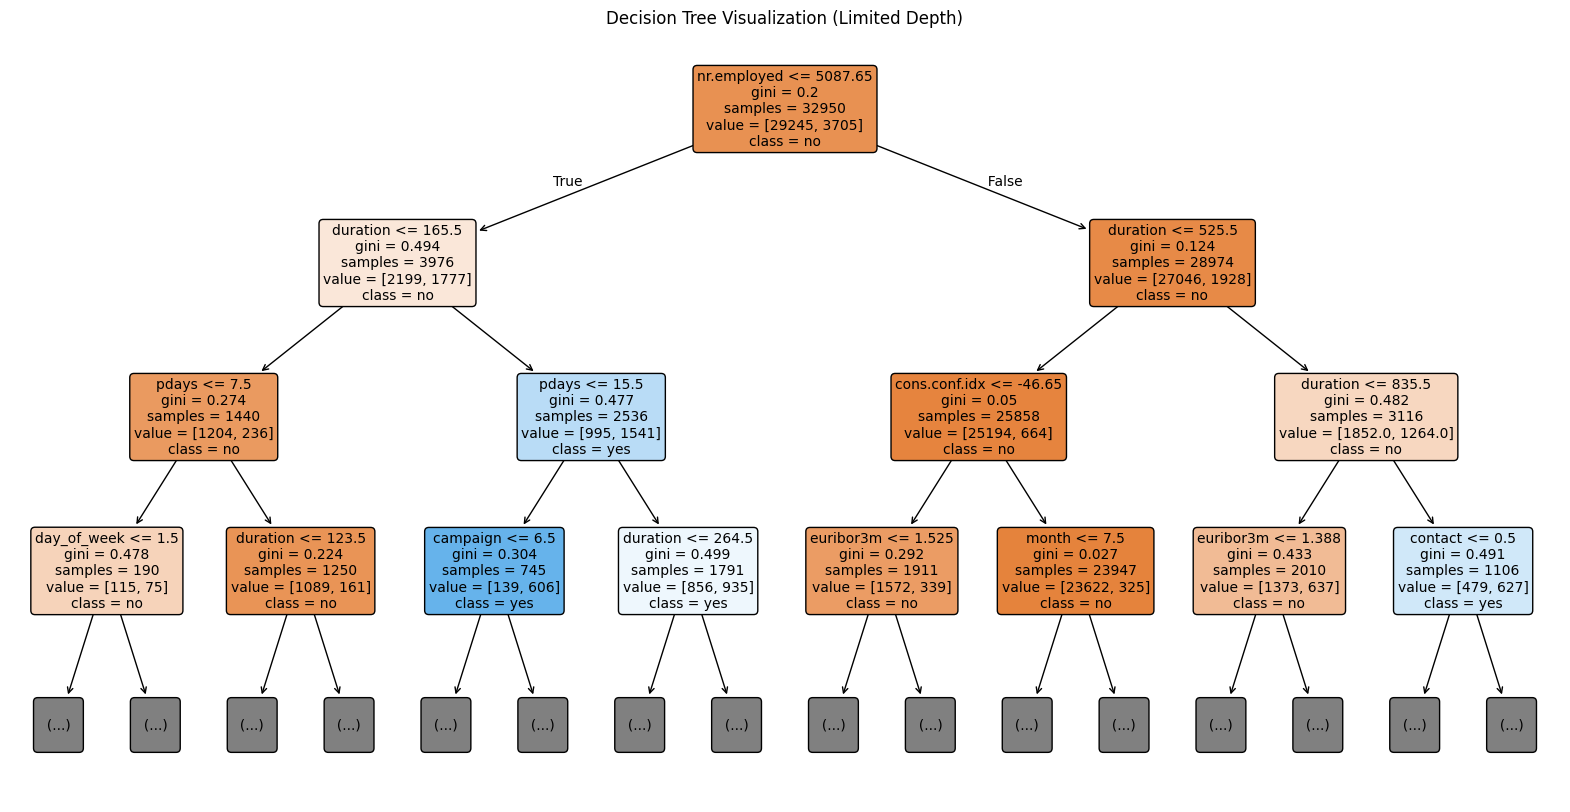

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=X.columns, class_names=['no', 'yes'],
          filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title('Decision Tree Visualization (Limited Depth)')
plt.show()

In [ ]:
data_encoded = data.copy()

In [ ]:
label_encoders = {}
for column in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

<ipython-input-22-adcfd36b1307>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data_encoded, palette='Set3')
<ipython-input-22-adcfd36b1307>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data_encoded, palette='Set3')
<ipython-input-22-adcfd36b1307>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y=feature, data=data_encoded, palette='Set3')
<ipython-input-22-adcfd36b1307>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

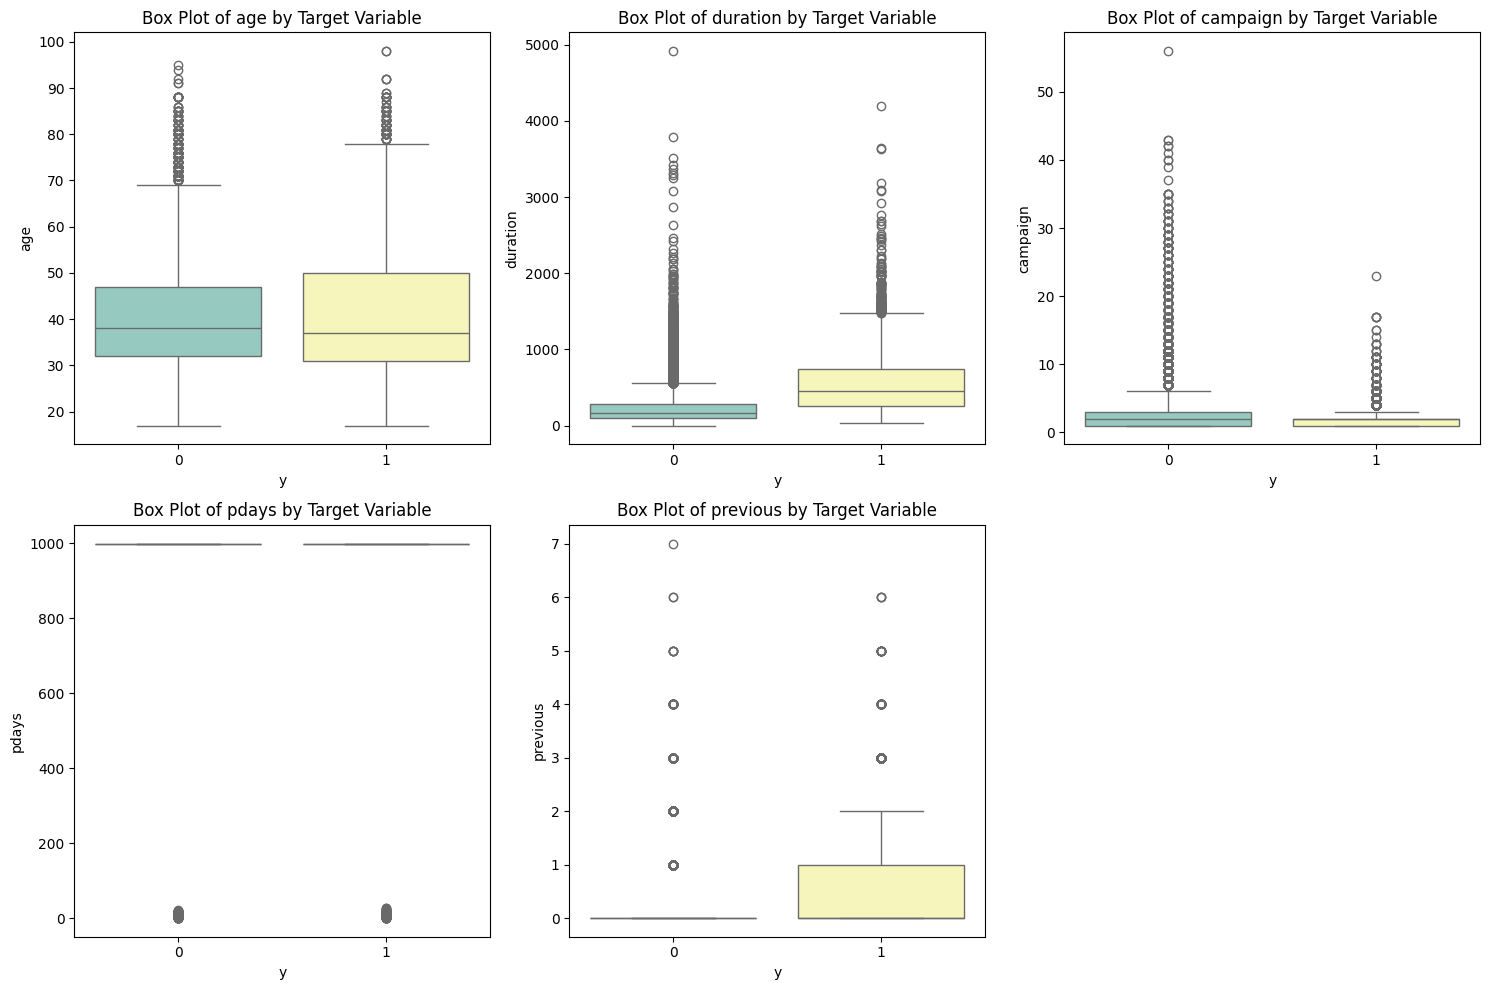

In [ ]:
plt.figure(figsize=(15, 10))
selected_features = ['age', 'duration', 'campaign', 'pdays', 'previous']
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(x='y', y=feature, data=data_encoded, palette='Set3')
    plt.title(f'Box Plot of {feature} by Target Variable')

plt.tight_layout()
plt.show()


<ipython-input-23-0ecef31ca5fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='y', y=column, data=mean_values, palette='pastel')
<ipython-input-23-0ecef31ca5fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='y', y=column, data=mean_values, palette='pastel')
<ipython-input-23-0ecef31ca5fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='y', y=column, data=mean_values, palette='pastel')


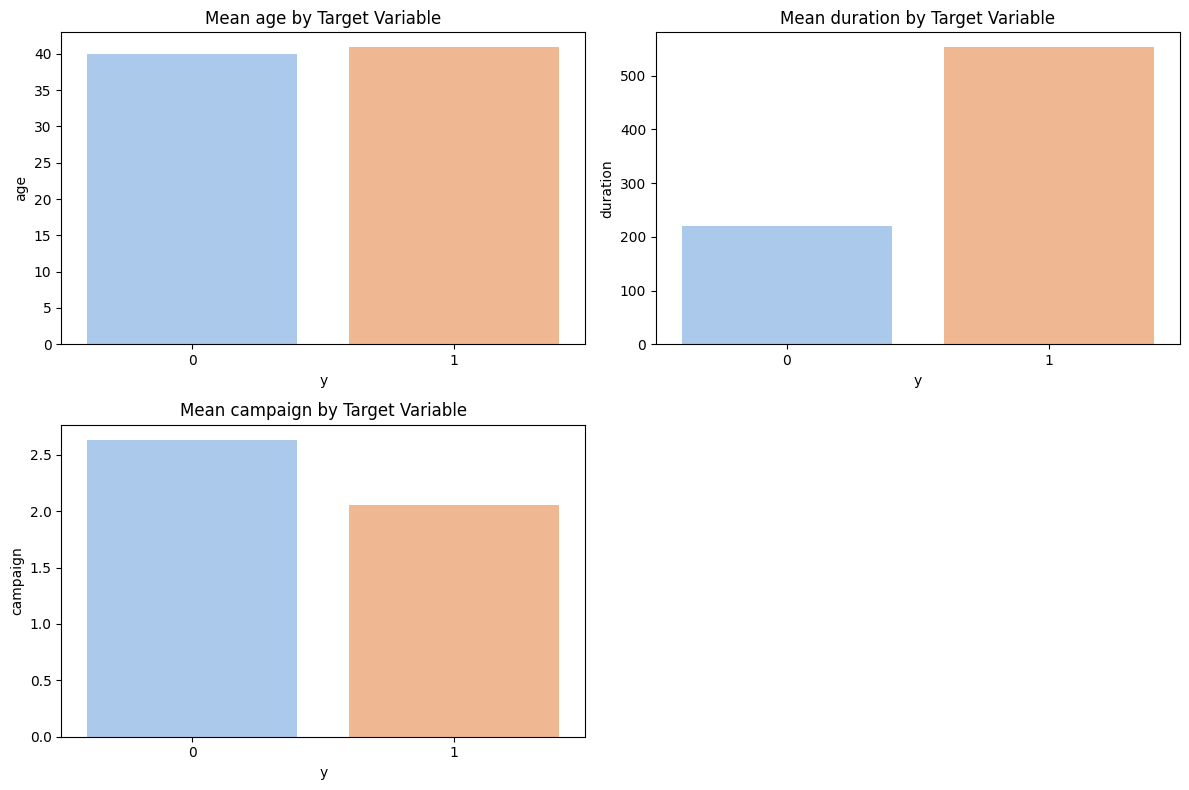

In [ ]:
plt.figure(figsize=(12, 8))
mean_values = data_encoded.groupby('y')[['age', 'duration', 'campaign']].mean().reset_index()

for i, column in enumerate(['age', 'duration', 'campaign'], 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='y', y=column, data=mean_values, palette='pastel')
    plt.title(f'Mean {column} by Target Variable')

plt.tight_layout()
plt.show()

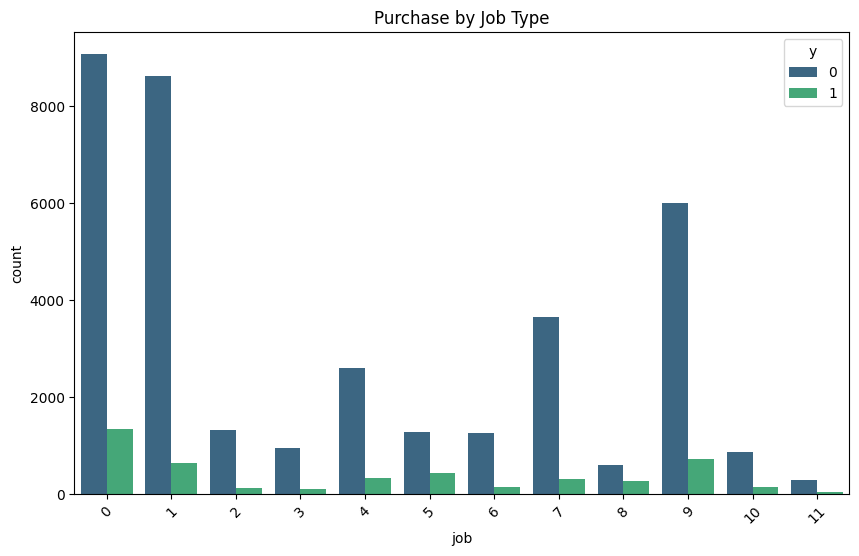

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='y', data=data, palette='viridis')  # You can change 'viridis' to any other palette
plt.title('Purchase by Job Type')
plt.xticks(rotation=45)
plt.show()